In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv(r'C:\Users\rashi\Desktop\titanic\train.csv', index_col=0)
test_df=pd.read_csv(r'C:\Users\rashi\Desktop\titanic\test.csv', index_col=0)
titanic_full_data = pd.concat([train_df, test_df], axis=0)

In [3]:
y_train = train_df["Survived"].values

In [4]:
df=titanic_full_data.copy()
df_v=df.copy()

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(1309, 11)

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [10]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [11]:
df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

# Amount of Nulls in Data

<AxesSubplot:>

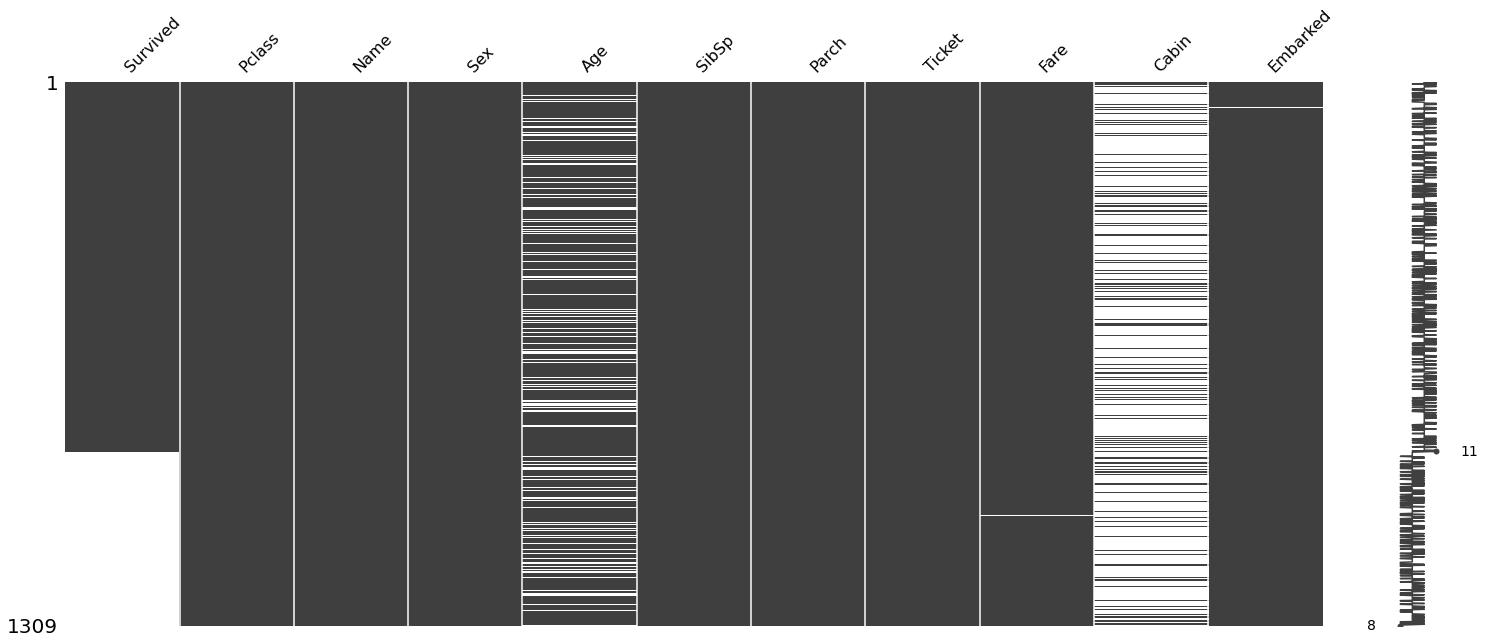

In [12]:
msn.matrix(df)

<AxesSubplot:>

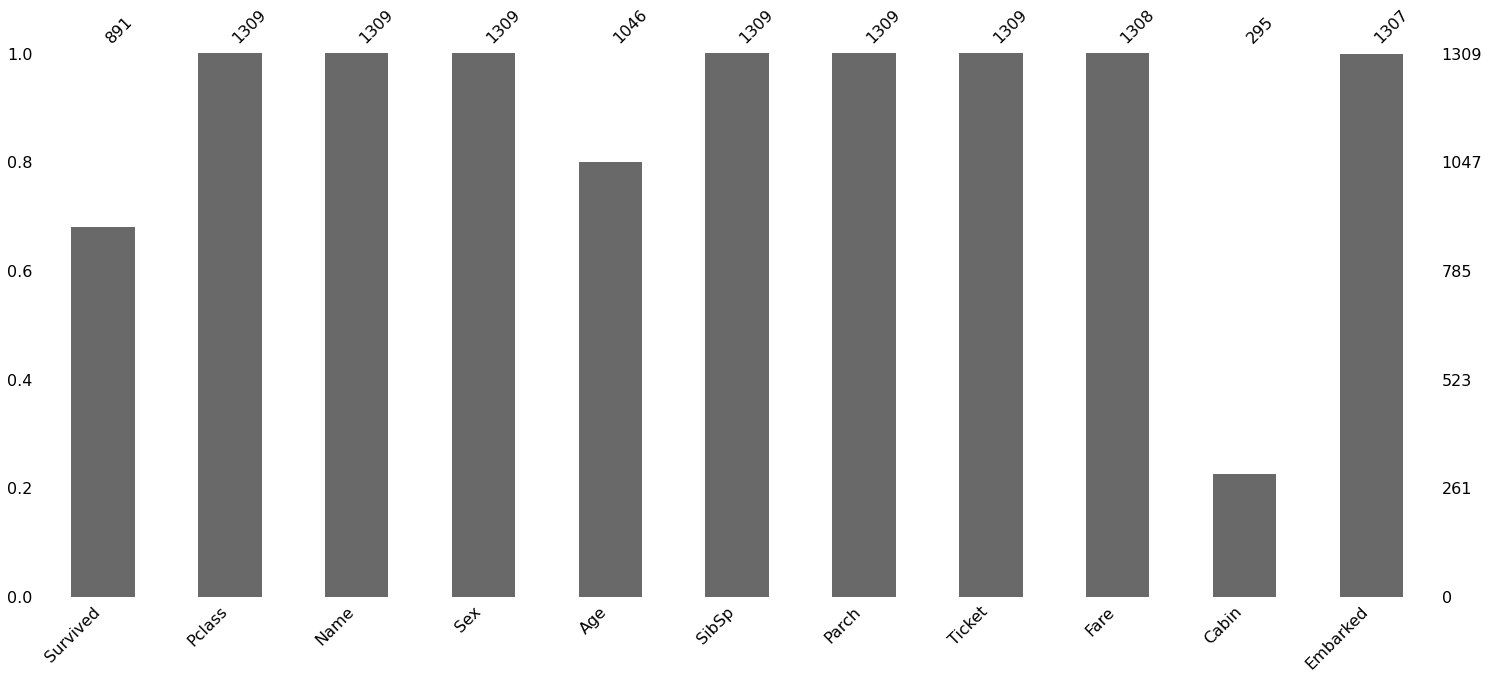

In [13]:
msn.bar(df)

# Working with nulls

In [14]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [15]:
df['Age'].head(10) # Age Column looks useless for prediction!

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [16]:
#df['Age'].fillna(df['Age'].mean(), inplace=True)

# Feature Engineering

In [17]:
df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [18]:
df[['Pclass', 'Survived']].groupby('Pclass').mean() #Survived by class
#Birinci class aid olan insanlar daha cox sag qaliblar. Correlation oldugu gorunur

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


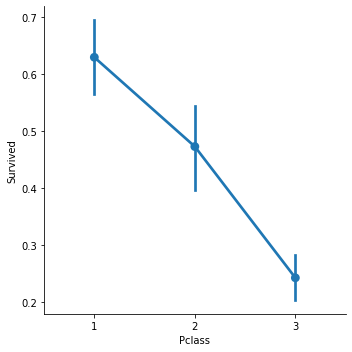

In [19]:
sns.catplot(x='Pclass', y='Survived', data=df_v, kind='point')

array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

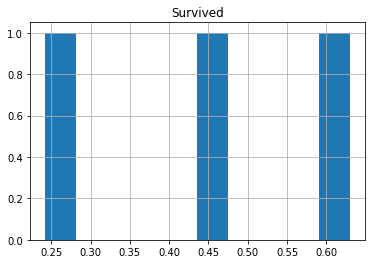

In [20]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().hist()


In [21]:
df['Embarked'] = df['Embarked'].fillna('S') #FILL 2 NULLS WITH "S"
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean() 

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [22]:
df[["Sex", "Survived"]].groupby(['Sex'], ).mean().sort_values(by='Survived', ascending=False) #women have survived more than men

,Survived
Sex,
female,0.742038
male,0.188908


In [23]:
df['FamilySize'] = df["SibSp"] + df["Parch"] 
df[["FamilySize", "Survived"]].groupby(['FamilySize'],).mean().sort_values(by='FamilySize', ascending=False)

,Survived
FamilySize,
10,0.000000
7,0.000000
6,0.333333
5,0.136364
4,0.200000
3,0.724138
2,0.578431
1,0.552795
0,0.303538


In [24]:
df["Alone"] = df['FamilySize'] == 0 
df[["Alone", "Survived"]].groupby(['Alone'],).mean().sort_values(by='Alone', ascending=False)

,Survived
Alone,
True,0.303538
False,0.505650


In [25]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median()) 
df['CategoricalFare'] = pd.qcut(df['Fare'], 4, precision=0) # 4 ayri qiymet cateqoriyasina ayriliblar
df[["CategoricalFare", "Survived"]].groupby(['CategoricalFare'],).mean().sort_values(by='CategoricalFare', ascending=False)

,Survived
CategoricalFare,
"(31.0, 512.0]",0.600000
"(14.0, 31.0]",0.441048
"(8.0, 14.0]",0.303571
"(-1.0, 8.0]",0.197309


In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,"(-1.0, 8.0]"
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,"(31.0, 512.0]"
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,"(8.0, 14.0]"
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,"(31.0, 512.0]"
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,"(8.0, 14.0]"


In [27]:
# Bu defe percentile gore yox, 5 aydin yas kateqoriyasina ayiririg
# Asagidaki neticeye esasen correlation var amma tam aydin gorsenmir
age_mean = df['Age'].mean()
age_std = df['Age'].std()
null_values_count = df['Age'].isnull().count() 
age_null_random_list = np.random.randint(age_mean - age_std, age_mean + age_std, size=null_values_count)


df['Age'][np.isnan(df['Age'])] = age_null_random_list
df['CategoricalAge'] = pd.cut(train_df['Age'], 5, precision=0)
df[["CategoricalAge", "Survived"]].groupby(['CategoricalAge'],).mean().sort_values(by='CategoricalAge', ascending=False)

,Survived
CategoricalAge,
"(64.0, 80.0]",0.090909
"(48.0, 64.0]",0.434783
"(32.0, 48.0]",0.404255
"(16.0, 32.0]",0.369942
"(0.0, 16.0]",0.550000


In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,"(-1.0, 8.0]","(16.0, 32.0]"
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,"(31.0, 512.0]","(32.0, 48.0]"
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,"(8.0, 14.0]","(16.0, 32.0]"
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,"(31.0, 512.0]","(32.0, 48.0]"
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,"(8.0, 14.0]","(32.0, 48.0]"


In [29]:
def rightValue(interval):
    return interval.right

df['CategoricalAge'] = df['CategoricalAge'].apply(rightValue)
df['CategoricalFare'] = df['CategoricalFare'].apply(rightValue)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,8.0,32.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,512.0,48.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,14.0,32.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,512.0,48.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,14.0,48.0


# Dropping useless columns

In [30]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'FamilySize', 'Age', ]
df = df.drop(drop_elements, axis = 1)

In [31]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,Alone,CategoricalFare,CategoricalAge
PassengerId,,,,,,,,
1,0.0,3,male,7.2500,S,False,8.0,32.0
2,1.0,1,female,71.2833,C,False,512.0,48.0
3,1.0,3,female,7.9250,S,True,14.0,32.0
4,1.0,1,female,53.1000,S,False,512.0,48.0
5,0.0,3,male,8.0500,S,True,14.0,48.0


# Encoding the Independent Variable

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CategoricalFare'] = encoder.fit_transform(df['CategoricalFare'])
df['CategoricalAge'] = encoder.fit_transform(df['CategoricalAge'])
df['Alone'] = encoder.fit_transform(df['Alone'])
df.head()

,Survived,Pclass,Sex,Fare,Embarked,Alone,CategoricalFare,CategoricalAge
PassengerId,,,,,,,,
1,0.0,3,male,7.2500,S,0,0,1
2,1.0,1,female,71.2833,C,0,3,2
3,1.0,3,female,7.9250,S,1,1,1
4,1.0,1,female,53.1000,S,0,3,2
5,0.0,3,male,8.0500,S,1,1,2


In [33]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)

enc_df = pd.DataFrame(enc.fit_transform(df[['Embarked', 'Sex']]).toarray())
# merge with main df bridge_df on key values

df = df.join(enc_df)
df = df.drop(['Embarked', 'Sex'], axis = 1)
df.reset_index()

df.head()

,Survived,Pclass,Fare,Alone,CategoricalFare,CategoricalAge,0,1,2,3,4
PassengerId,,,,,,,,,,,
1,0.0,3,7.2500,0,0,1,1.0,0.0,0.0,1.0,0.0
2,1.0,1,71.2833,0,3,2,0.0,0.0,1.0,1.0,0.0
3,1.0,3,7.9250,1,1,1,0.0,0.0,1.0,1.0,0.0
4,1.0,1,53.1000,0,3,2,0.0,0.0,1.0,0.0,1.0
5,0.0,3,8.0500,1,1,2,0.0,1.0,0.0,0.0,1.0


In [34]:
df.Alone = encoder.fit_transform(df.Alone)

In [35]:
df.head()

,Survived,Pclass,Fare,Alone,CategoricalFare,CategoricalAge,0,1,2,3,4
PassengerId,,,,,,,,,,,
1,0.0,3,7.2500,0,0,1,1.0,0.0,0.0,1.0,0.0
2,1.0,1,71.2833,0,3,2,0.0,0.0,1.0,1.0,0.0
3,1.0,3,7.9250,1,1,1,0.0,0.0,1.0,1.0,0.0
4,1.0,1,53.1000,0,3,2,0.0,0.0,1.0,0.0,1.0
5,0.0,3,8.0500,1,1,2,0.0,1.0,0.0,0.0,1.0


In [36]:
df.drop(columns = ['Fare'])
df = df[df['Survived'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    float64
 1   Pclass           891 non-null    int64  
 2   Fare             891 non-null    float64
 3   Alone            891 non-null    int64  
 4   CategoricalFare  891 non-null    int64  
 5   CategoricalAge   891 non-null    int64  
 6   0                891 non-null    float64
 7   1                891 non-null    float64
 8   2                891 non-null    float64
 9   3                891 non-null    float64
 10  4                891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 83.5 KB


# Vizualization

Text(0, 0.5, 'Amount of rooms')

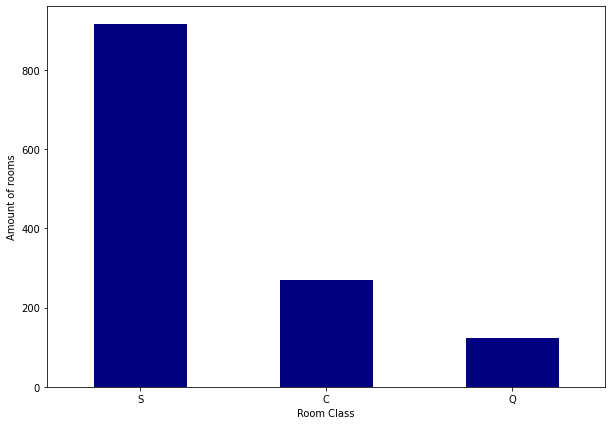

In [37]:
plt.figure(figsize=(10,7))
df_v['Embarked'].value_counts().plot.bar(color='navy')
plt.xticks(rotation='horizontal')
plt.xlabel('Room Class')
plt.ylabel('Amount of rooms')

In [38]:
numeric_cols=df._get_numeric_data().columns #Numeric columns
categoric_cols=list(set(df.columns)-set(numeric_cols)) #categoric columns

In [39]:
df_v['Parch'].tail()

PassengerId
1305    0
1306    0
1307    0
1308    0
1309    1
Name: Parch, dtype: int64

# 

Text(0.5, 0, 'People with Children')

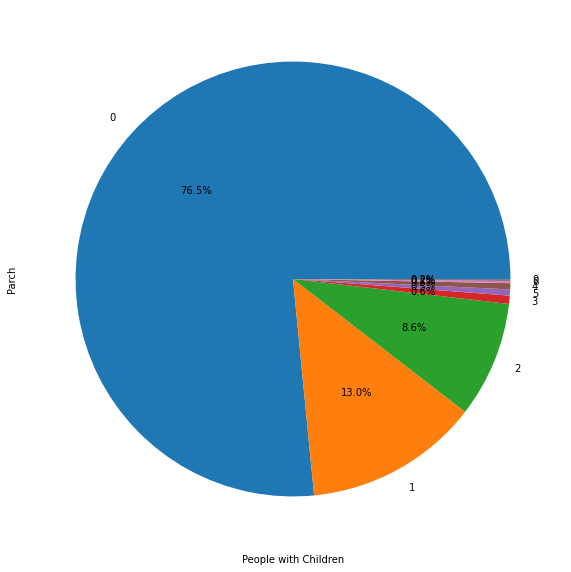

In [40]:
plt.figure(figsize=(10,10))
df_v.Parch.value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('People with Children')

In [41]:
df_v.Parch

PassengerId
1       0
2       0
3       0
4       0
5       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    1
Name: Parch, Length: 1309, dtype: int64

# Survived Analytics

In [42]:
df_v['Survived'].sum() # 342 Out of the 891 survived

342.0

In [43]:
df_v.agg({'Age':['max', 'min', 'median', 'mean']}).T

,max,min,median,mean
Age,80.0,0.17,28.0,29.881138


# Age grouping

In [44]:
def age(i):
    if i<=14:
        return 'Young'
    
    elif i<= 24 and i>=15:
        return 'Youth'
    
    elif i<=64 and i>=25:
        return 'Adult'
    
    else:
        return 'Senior'

In [45]:
df_v['Age group']=df_v['Age'].map(age)

# Percentage of survived and not survived people

Text(0.5, 1.0, 'Survived and not')

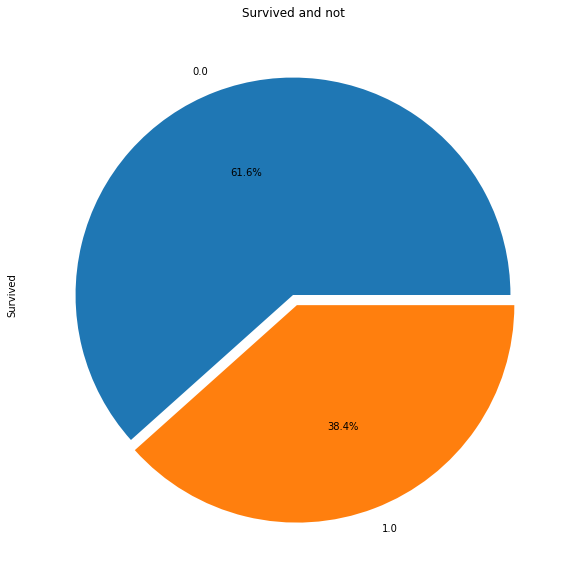

In [46]:
plt.figure(figsize=(10,10))
df_v['Survived'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.05])
plt.title('Survived and not')

# Percentage of age group in Titanic

<AxesSubplot:ylabel='Age group'>

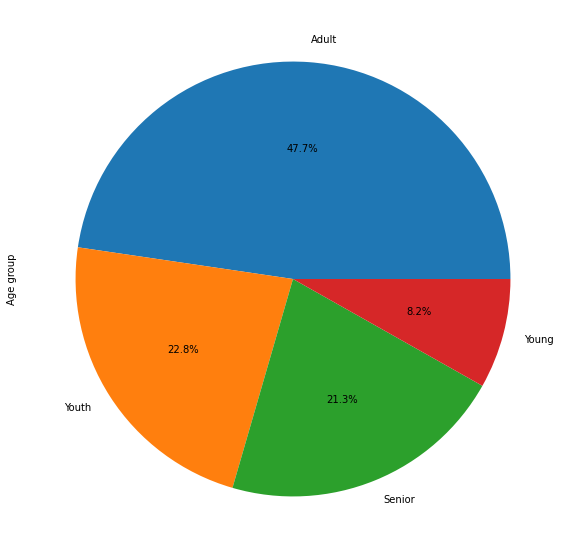

In [47]:
plt.figure(figsize=(10,10))
df_v['Age group'].value_counts().plot.pie(autopct='%1.1f%%') 

# Percentage of survived age group in Titanic

<AxesSubplot:ylabel='Age group'>

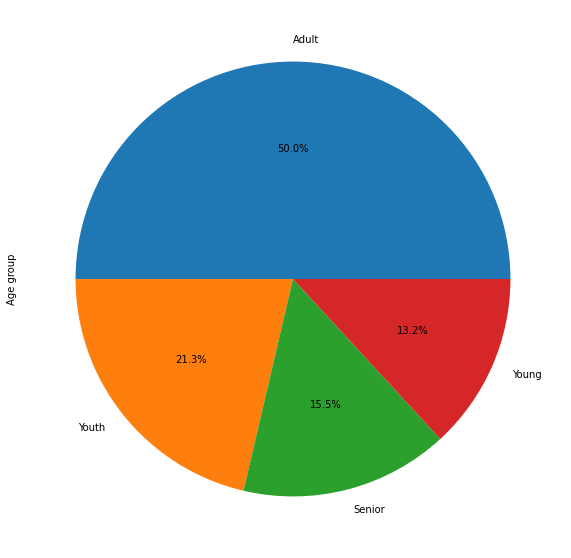

In [48]:
plt.figure(figsize=(10,10))
df_v[df_v['Survived']==1]['Age group'].value_counts().plot.pie(autopct='%1.1f%%')



# Percentage of unsurvived age group in Titanic

<AxesSubplot:ylabel='Age group'>

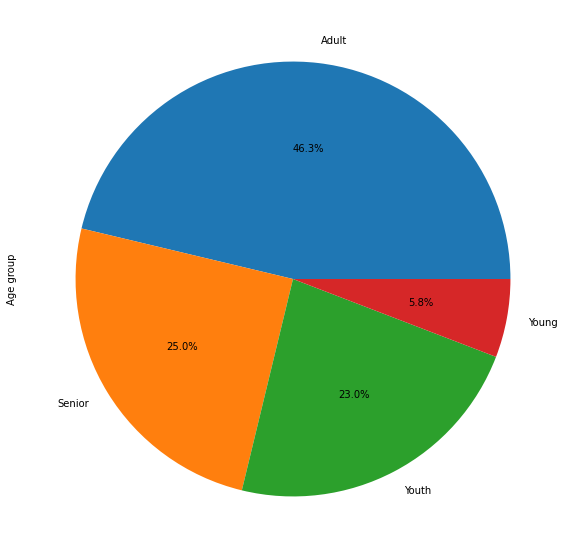

In [49]:
plt.figure(figsize=(10,10))
df_v[df_v['Survived']==0]['Age group'].value_counts().plot.pie(autopct='%1.1f%%')


# Survived males age group

<AxesSubplot:ylabel='Age group'>

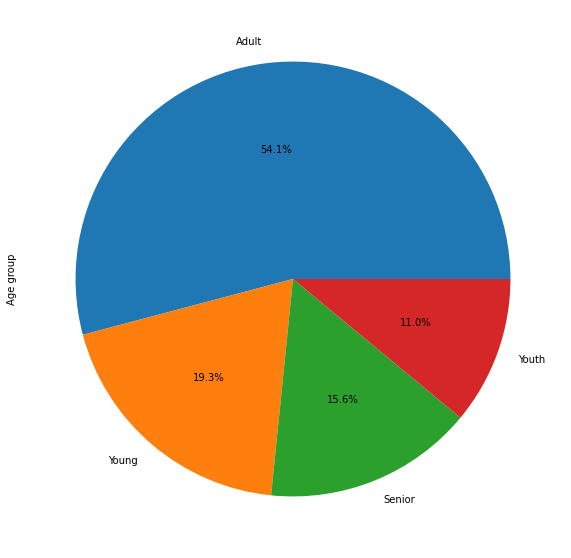

In [50]:
plt.figure(figsize=(10,10))
df_v[(df_v['Survived']==1) & (df_v['Sex']=='male')]['Age group'].value_counts().plot.pie(autopct='%1.1f%%')

# Not Survived males age group

<AxesSubplot:ylabel='Age group'>

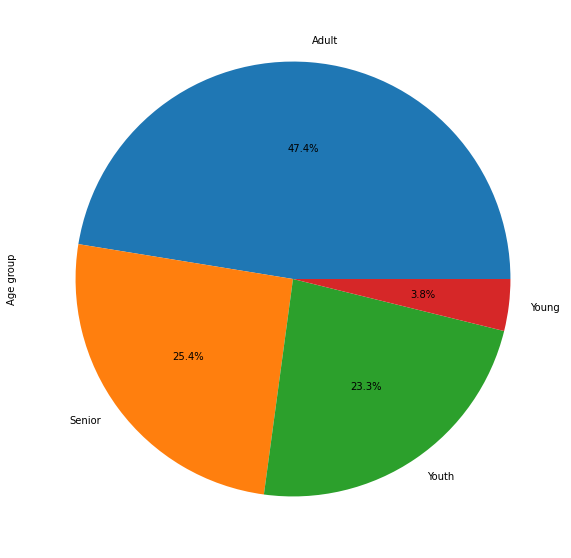

In [51]:
plt.figure(figsize=(10,10))
df_v[(df_v['Survived']==0) & (df_v['Sex']=='male')]['Age group'].value_counts().plot.pie(autopct='%1.1f%%')

# Survived females age group

<AxesSubplot:ylabel='Age group'>

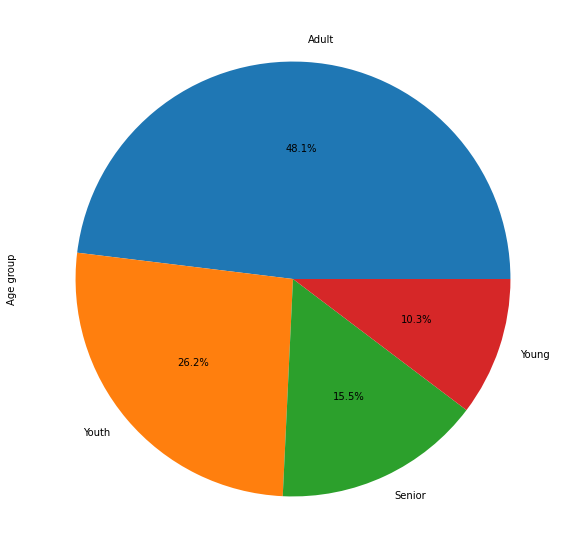

In [52]:
plt.figure(figsize=(10,10))
df_v[(df_v['Survived']==1) & (df_v['Sex']=='female')]['Age group'].value_counts().plot.pie(autopct='%1.1f%%')

# Not Survived females age group

<AxesSubplot:ylabel='Age group'>

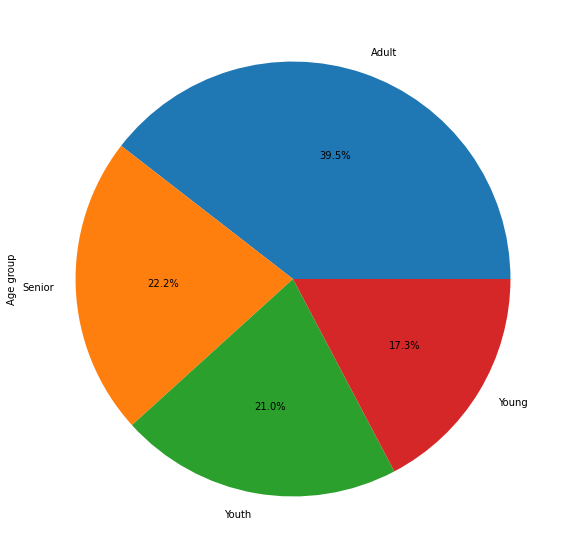

In [53]:
plt.figure(figsize=(10,10))
df_v[(df_v['Survived']==0) & (df_v['Sex']=='female')]['Age group'].value_counts().plot.pie(autopct='%1.1f%%')

# Sex group

Text(0.5, 1.0, 'Amount of males and females in Titanic')

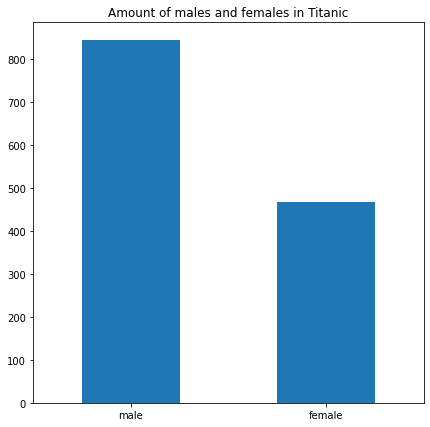

In [54]:
plt.figure(figsize=(7,7))
df_v['Sex'].value_counts().plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Amount of males and females in Titanic')

# Survived sex group

Text(0.5, 1.0, 'Survived Sex group')

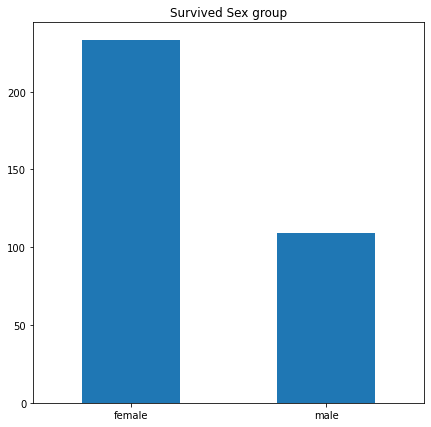

In [55]:
plt.figure(figsize=(7,7))
df_v[df_v['Survived']==1]['Sex'].value_counts().plot.bar()
plt.xticks(rotation='horizontal')
plt.title("Survived Sex group")


# Unsurvived sex group

#

Text(0.5, 1.0, 'Unsurvived Sex group')

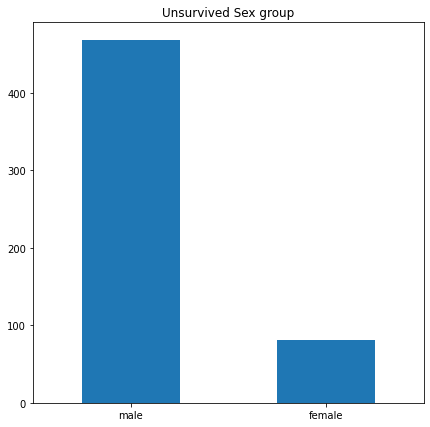

In [56]:
plt.figure(figsize=(7,7))
df_v[df_v['Survived']==0]['Sex'].value_counts().plot.bar()
plt.xticks(rotation='horizontal')
plt.title("Unsurvived Sex group")


<AxesSubplot:xlabel='Age', ylabel='Density'>

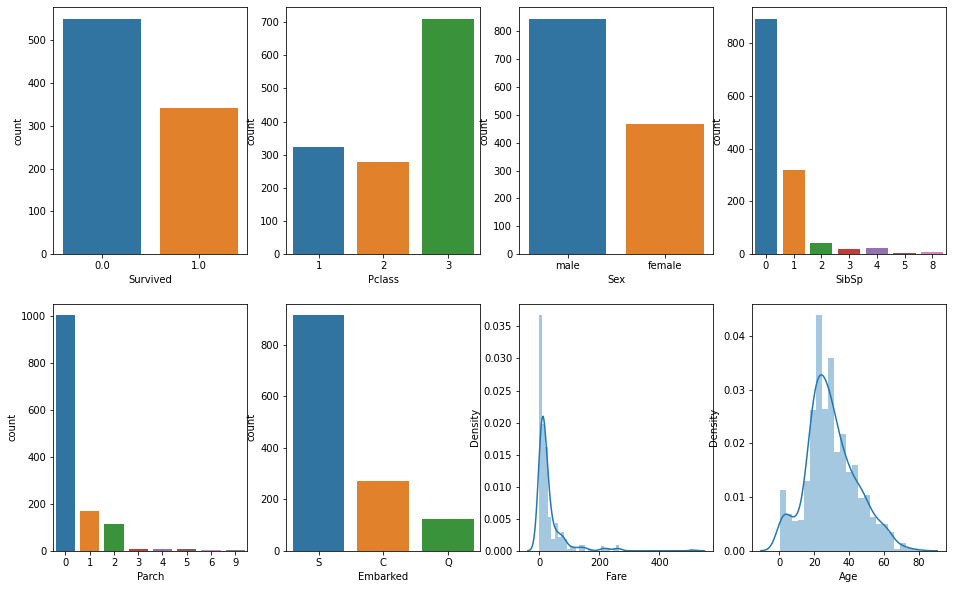

In [57]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=df_v,ax=axes[0,0])
sns.countplot('Pclass',data=df_v,ax=axes[0,1])
sns.countplot('Sex',data=df_v,ax=axes[0,2])
sns.countplot('SibSp',data=df_v,ax=axes[0,3])
sns.countplot('Parch',data=df_v,ax=axes[1,0])
sns.countplot('Embarked',data=df_v,ax=axes[1,1])
sns.distplot(df_v['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df_v['Age'].dropna(),kde=True,ax=axes[1,3])

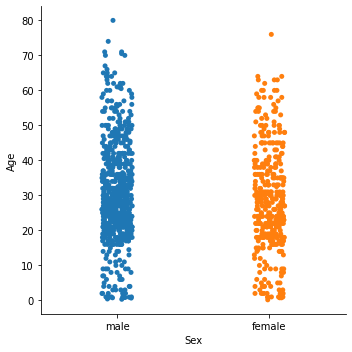

In [58]:
sns.catplot(x='Sex', y='Age', data=df_v)

In [59]:
df_v[(df_v['Survived']==1) & (df_v['Age']<20)]['Survived'].sum() #Young 

79.0

In [60]:
df_v[(df_v['Survived']==1) & (df_v['Age']>20) & (df_v['Age']<40)]['Survived'].sum() #Adult

147.0

In [61]:
df_v[(df_v['Survived']==1) & (df_v['Age']>40) & (df_v['Age']<60)]['Survived'].sum() #Middle

48.0

In [62]:
df_v[(df_v['Survived']==1) & (df_v['Age']>60)]['Survived'].sum() #Old

5.0

In [63]:
pd.DataFrame({'Age Groups':['Young','Adult','Middle','Old'],'Amount of survived':[79,199,48,5]})

,Age Groups,Amount of survived
0,Young,79
1,Adult,199
2,Middle,48
3,Old,5


In [64]:
df.head(10)

,Survived,Pclass,Fare,Alone,CategoricalFare,CategoricalAge,0,1,2,3,4
PassengerId,,,,,,,,,,,
1,0.0,3,7.2500,0,0,1,1.0,0.0,0.0,1.0,0.0
2,1.0,1,71.2833,0,3,2,0.0,0.0,1.0,1.0,0.0
3,1.0,3,7.9250,1,1,1,0.0,0.0,1.0,1.0,0.0
4,1.0,1,53.1000,0,3,2,0.0,0.0,1.0,0.0,1.0
5,0.0,3,8.0500,1,1,2,0.0,1.0,0.0,0.0,1.0
6,0.0,3,8.4583,1,1,5,0.0,0.0,1.0,0.0,1.0
7,0.0,1,51.8625,1,3,3,0.0,0.0,1.0,0.0,1.0
8,0.0,3,21.0750,0,2,0,0.0,0.0,1.0,1.0,0.0
9,1.0,3,11.1333,0,1,1,1.0,0.0,0.0,1.0,0.0


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Alone,891.0,0.602694,0.489615,0.0,0.0000,1.0000,1.0,1.0000
CategoricalFare,891.0,1.489338,1.111052,0.0,0.5000,1.0000,2.0,3.0000
CategoricalAge,891.0,2.085297,1.657641,0.0,1.0000,1.0000,3.0,5.0000
0,891.0,0.188552,0.391372,0.0,0.0000,0.0000,0.0,1.0000
1,891.0,0.087542,0.282787,0.0,0.0000,0.0000,0.0,1.0000
2,891.0,0.723906,0.447315,0.0,0.0000,1.0000,1.0,1.0000
3,891.0,0.352413,0.477990,0.0,0.0000,0.0000,1.0,1.0000


<AxesSubplot:ylabel='Frequency'>

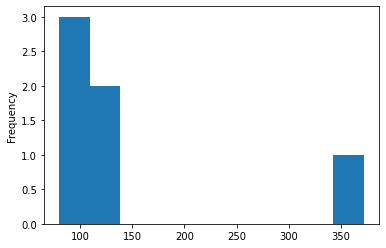

In [66]:
df.groupby(['Pclass', 'Survived'])['Survived'].count().plot.hist()

In [67]:
#df.to_csv(r'C:\Users\rashi\Desktop\titanic_cvb.csv', index=False)

<AxesSubplot:>

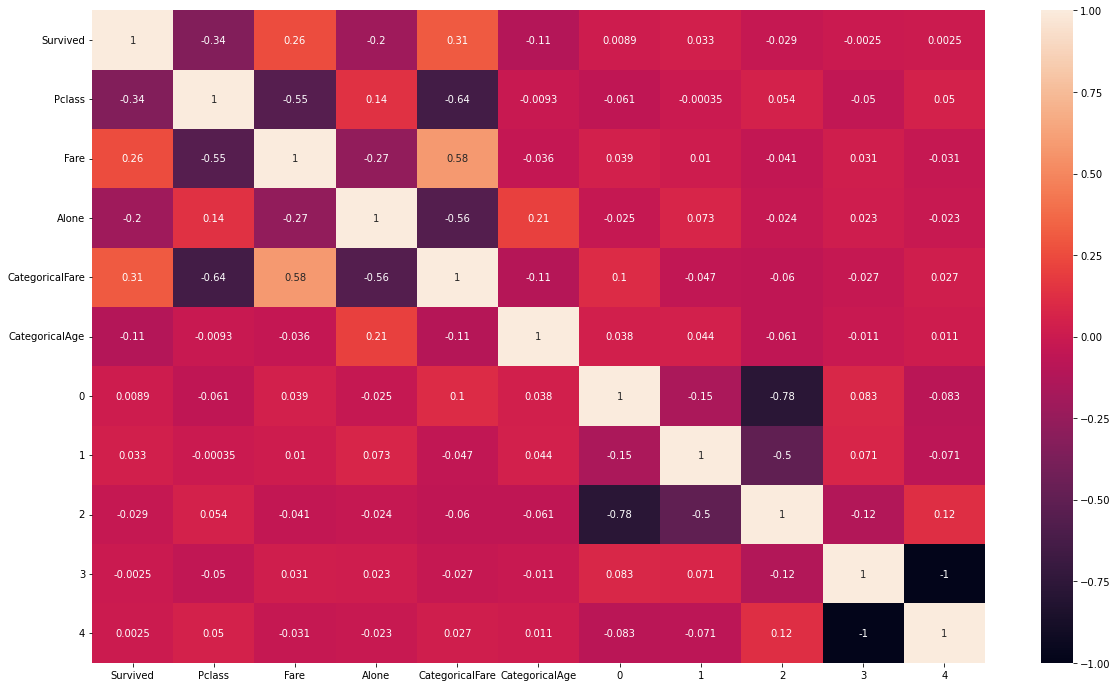

In [68]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)

# Machine Learning

In [69]:
df1=df
# sex = pd.get_dummies(df['Sex'],drop_first=True)
# sex.head()

In [70]:
X= df.drop('Survived',axis=1) 
Y= df['Survived'] #trying to predict

# Logistic Regression

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
params={"C": [0.001, 0.01, 0.1, 1.],
        "penalty": ["l1", "l2"]}

lr=RandomizedSearchCV(LogisticRegression(), params, cv=5, verbose=1, n_jobs=-1)
lr.fit(X_train, y_train)
lr_y_pred=lr.predict(X_test)
accuracy_score(y_test, lr_y_pred)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


0.6828358208955224

In [74]:
acc_lr = round(accuracy_score(y_test, lr_y_pred) * 100, 2 )

In [75]:
"""
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
"""

'\nlogmodel = LogisticRegression()\nlogmodel.fit(X_train,y_train)\npredictions = logmodel.predict(X_test)\n'

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76       154
         1.0       0.71      0.43      0.54       114

    accuracy                           0.68       268
   macro avg       0.69      0.65      0.65       268
weighted avg       0.69      0.68      0.66       268



# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

knn=RandomizedSearchCV(KNeighborsClassifier(), parameters, cv=10, scoring='accuracy', n_iter=10, random_state=5)
knn.fit(X_train, y_train)
knn_y_pred=knn.predict(X_test)
accuracy_score(y_test, knn_y_pred)

0.6492537313432836

In [80]:
# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(KNeighborsClassifier(), parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Calculating the accuracy
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

NameError: name 'GridSearchCV' is not defined

In [ ]:
"""
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
"""

'\nknn = KNeighborsClassifier()\nknn.fit(X_train, y_train)\nknn_predictions = knn.predict(X_test)\n'

In [ ]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75       154
         1.0       0.69      0.32      0.43       114

    accuracy                           0.65       268
   macro avg       0.67      0.61      0.59       268
weighted avg       0.66      0.65      0.61       268



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### RandomizedSearchCV Tuning method 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
params = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
        }

rf=RandomizedSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), params, cv=5, verbose=1, n_jobs=-1)

rf.fit(X_train, y_train)
rf_y_pred=rf.predict(X_test)
accuracy_score(y_test, rf_y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.6791044776119403

In [ ]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       154
         1.0       0.65      0.53      0.58       114

    accuracy                           0.68       268
   macro avg       0.67      0.66      0.66       268
weighted avg       0.68      0.68      0.67       268



### GridSearchCV Tuning method

In [ ]:
#Hyperparameters Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

#Make GridSearchCV Model
grid_obj = GridSearchCV(RandomForestClassifier(), parameters)
#Fit our model to training Data
grid_obj = grid_obj.fit(X_train, y_train)

#Getting best combination of parametr
rf1 = grid_obj.best_estimator_

#Prediction on test data
rf2_y_pred = rf.predict(X_test)


acc_rf = round(accuracy_score(y_test, rf2_y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model GridSearchCV : ', acc_rf )

Accuracy of Random Forest model GridSearchCV :  67.91


In [ ]:
acc_rf = round(accuracy_score(y_test, rf2_y_pred) * 100, 2 )

In [ ]:
"""
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
"""

'\nrf = RandomForestClassifier()\nrf.fit(X_train, y_train)\nrf_predictions = rf.predict(X_test)\n'

In [ ]:
print(classification_report(y_test, rf2_y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       154
         1.0       0.65      0.53      0.58       114

    accuracy                           0.68       268
   macro avg       0.67      0.66      0.66       268
weighted avg       0.68      0.68      0.67       268



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
params={"max_depth": [3, 5, 7, 9, 11, 13],
        "max_features":[1, 9],
        "min_samples_leaf": [1, 9],
        "criterion": ["gini", "entropy"]}

dt=RandomizedSearchCV(DecisionTreeClassifier(), params, cv=5, verbose=1, n_jobs=-1)
dt.fit(X_train, y_train)
dt_y_pred=dt.predict(X_test)
accuracy_score(y_test, dt_y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.6791044776119403

In [ ]:
dt.best_params_

{'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}

In [ ]:
acc_dt = round(accuracy_score(y_test, dt_y_pred) * 100, 2 )

In [ ]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.83      0.75       154
         1.0       0.68      0.47      0.56       114

    accuracy                           0.68       268
   macro avg       0.68      0.65      0.65       268
weighted avg       0.68      0.68      0.67       268



# Support Vector Machine

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
params={'C':[1,10,20],
        'kernel':['rbf','linear']}

svm=RandomizedSearchCV(SVC(), params, cv=5, return_train_score=False, n_iter=2)
svm.fit(X_train, y_train)
svm_y_pred=svm.predict(X_test)
accuracy_score(y_test, svm_y_pred)

0.6753731343283582

In [86]:
acc_svm = round(accuracy_score(y_test, svm_y_pred) * 100, 2 )
acc_svm

67.54

In [ ]:
"""
svc = SVC()
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
print(classification_report(y_test,svc_predictions))
"""

'\nsvc = SVC()\nsvc.fit(X_train, y_train)\nsvc_predictions = svc.predict(X_test)\nprint(classification_report(y_test,svc_predictions))\n'

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN','Random Forest', 'Decision Tree','Support Vector Machine'],
    'Score': [acc_lr, acc_knn, acc_dt, acc_rf, acc_svm]})
models.sort_values(by='Score', ascending=False)


,Model,Score
0,Logistic Regression,68.28
2,Random Forest,67.91
3,Decision Tree,67.91
4,Support Vector Machine,66.79
1,KNN,66.42


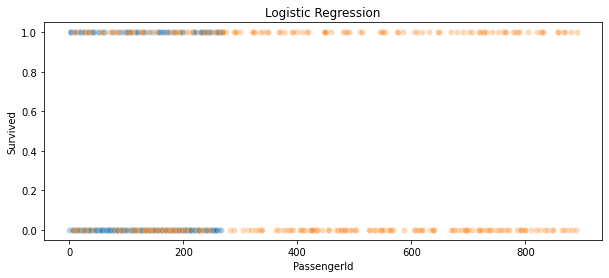

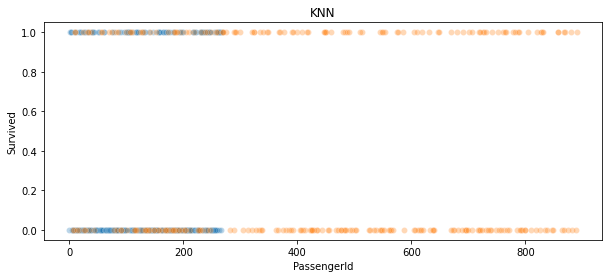

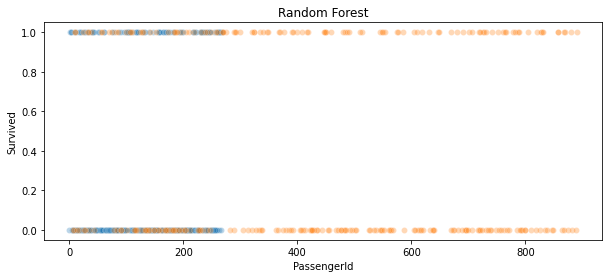

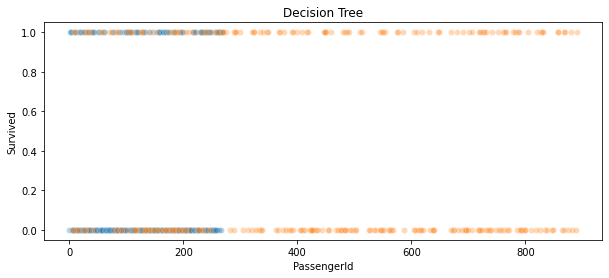

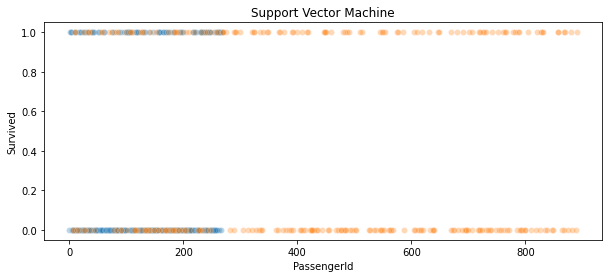

In [ ]:
prediction=[lr_y_pred, knn_y_pred, dt_y_pred, rf_y_pred, svm_y_pred]
Model=['Logistic Regression', 'KNN','Random Forest', 'Decision Tree','Support Vector Machine']
n=0

for pred in prediction:
    plt.figure(figsize=(10, 4))

    sns.scatterplot(data=dt_y_pred, alpha=0.3)
    sns.scatterplot(data=y_test, alpha=0.3)

    plt.title(Model[n])
    n=n+1
    
    plt.show()
    

